In [1]:
import os
import os.path as osp
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem1

### Problem 1.1
(10%) For K = 2, 4, 8, 16, and 32, perform K-means clustering on the provided <span class="burk">bird.jpg</span> by
taking the RGB values of each pixel as the feature of interest. Take a 64 × 64 pixel color image
for example, we have a total of 64 × 64 = 4096 data points for K-means clustering, and each
data point is described as a three dimensional vector (i.e., (R, G, B)). To visualize your image
segmentation results, plot the clustering results by replacing all pixels’ RGB value in each cluster
with the that of the corresponding cluster center.

In [2]:
# Helper functions

def pdist(points, centroids):
    """Compute euclidean distance between points & centroids"""
    dists = np.sqrt(((points[:, np.newaxis, :]-centroids)**2).sum(axis=2))
    return dists

def init_centroids(points, K):
    """Initialize K clusters from points data"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:K]

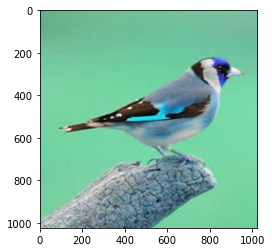

In [3]:
# Read in image
bird_img = cv2.imread('bird.jpg')

# Flatten image to X of shape (1024*1024, 3)
points = bird_img.reshape(-1, 3)

plt.imshow(bird_img)

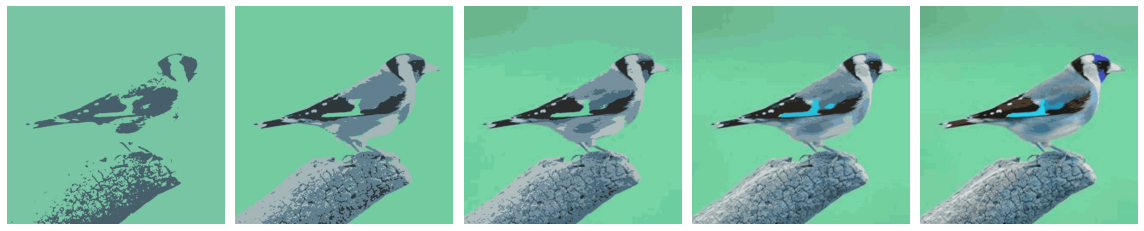

In [4]:
MAX_ITERATION = 30

Ks = [2, 4, 8, 16, 32]

fig, axes = plt.subplots(nrows=1, ncols=len(Ks), figsize=(16, 4))

for i, K in enumerate(Ks):
    
    centroids = init_centroids(points, K)
    
    # Fit centroids to the points
    iter_count = 0
    while iter_count < MAX_ITERATION:
        dists = pdist(points, centroids)
        labels = np.argmin(dists, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([ points[labels==label].mean(axis=0)
                                  if np.sum(labels==label) > 0 else c
                                  for label, c in enumerate(centroids) ])
        
        # Compute the difference between new & old centroids
        diff = np.sum(np.sqrt(((centroids - new_centroids)**2).sum(axis=1)))
        
        if diff > 0.0001:
            iter_count += 1
            centroids = new_centroids
        else:
            break

    # Give every points the label of cluster
    dists = pdist(points, centroids)
    plabels = np.argmin(dists, axis=1)
    
    # Show segmented image
    segment_img = np.array([ centroids[plabel] for plabel in plabels ])
    segment_img = segment_img.reshape(bird_img.shape)
    segment_img = np.uint8(segment_img)
    axes[i].imshow(segment_img)
    axes[i].set_axis_off()
    
plt.tight_layout()

### Problem 1.2
(6%) Repeat 1. but take both RGB values and the location (x and y) as a five dimensional vector
as the feature for describing each pixel. Show the segmentation results.

In [5]:
# Flatten image to X of shape (1024*1024, 3)
points_3d = bird_img.reshape(-1, 3)

# Coordinate information
height = bird_img.shape[0]
width = bird_img.shape[1]
points_2d = np.array([ np.array([ i//height, i%width ])
                        for i in range(len(points_3d)) ])

# Concate pixel and coordinate together
points_5d = np.concatenate([points_3d, points_2d], axis=1)

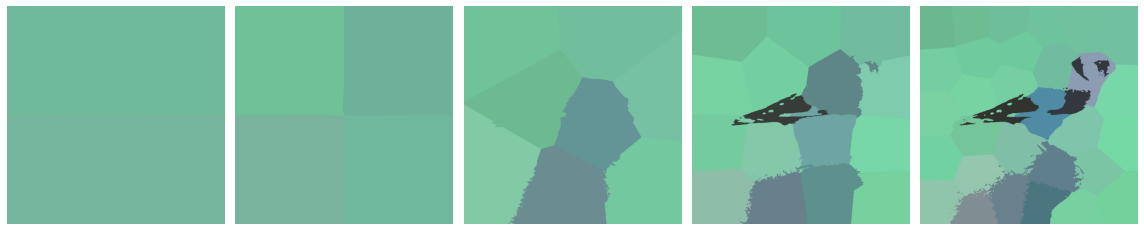

In [6]:
MAX_ITERATION = 30

Ks = [2, 4, 8, 16, 32]

fig, axes = plt.subplots(nrows=1, ncols=len(Ks), figsize=(16, 4))

for i, K in enumerate(Ks):
    
    centroids = init_centroids(points_5d, K)
    
    # Fit centroids to the points_5d
    iter_count = 0
    while iter_count < MAX_ITERATION:
        dists = pdist(points_5d, centroids)
        labels = np.argmin(dists, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([ points_5d[labels==label].mean(axis=0)
                                  if np.sum(labels==label) > 0 else c
                                  for label, c in enumerate(centroids) ])
        
        # Compute the difference between new & old centroids
        diff = np.sum(np.sqrt(((centroids - new_centroids)**2).sum(axis=1)))
        
        if diff > 0.0001:
            iter_count += 1
            centroids = new_centroids
        else:
            break

    # Give every points_5d the label of cluster
    dists = pdist(points_5d, centroids)
    plabels = np.argmin(dists, axis=1)
    
    # Show segmented image
    segment_img = np.array([ centroids[plabel][:3] for plabel in plabels ])
    segment_img = segment_img.reshape(bird_img.shape)
    segment_img = np.uint8(segment_img)
    axes[i].imshow(segment_img)
    axes[i].set_axis_off()
    
plt.tight_layout()

### Problem 1.3
(8%) Compare your results obtained in 1. and 2., and briefly explain the differences between the
two methods under the same K. If further improved segmentation results would be desirable,
please provide possible modification or extension to the above feature definition (and visualize
your results).

**In the first problem, we use only pixel value (color information) to perform kmeans clustering. Therefore, the kmeans model will segment the image based on pixel values.**

**However, in problem 2, we use both pixel value (color information) and pixel position (spatial information) to perform kmeans clustering. The kmeans model will try cluster the data points given their position. Therefore, you can see there are multiple polygon patches in the segmented image at different regions.**

## Problem2

### Problem 2.1
(15%) Perform PCA on the training set. Plot the mean face and the first four eigenfaces.

In [7]:
IMG_DIR = "p2_data"

# Train test split
files = [ osp.join(IMG_DIR, f) for f in os.listdir(IMG_DIR) ]
train_files = [ f 
                for f in files
                if int(osp.basename(f)[:-4].split("_")[-1]) < 10 ]
test_files =  [ f 
                for f in files
                if int(osp.basename(f)[:-4].split("_")[-1]) == 10 ]

# Load img files
train_x = np.array([ cv2.imread(f, cv2.IMREAD_GRAYSCALE).reshape(-1) for f in train_files ])
train_y = np.array([ int(osp.basename(f)[:-4].split("_")[0])
                    for f in train_files
                    if int(osp.basename(f)[:-4].split("_")[-1]) < 10 ])

test_x = np.array([ cv2.imread(f, cv2.IMREAD_GRAYSCALE).reshape(-1) for f in test_files ])
test_y = np.array([ int(osp.basename(f)[:-4].split("_")[0])
                    for f in test_files
                    if int(osp.basename(f)[:-4].split("_")[-1]) == 10 ])

In [8]:
# Compute PCA, and find principle components
X = train_x
mu = np.mean(X, axis=0)
X = X - mu

# Find principle components
Cov = np.dot(X.T, X)
eigenvalues, eigenvectors = np.linalg.eigh(Cov)

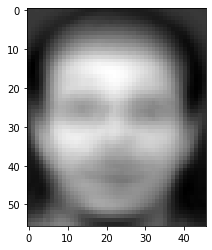

In [9]:
# Plot mean face
mean_face = mu.reshape((56, 46))
plt.imshow(mean_face, cmap='gray')

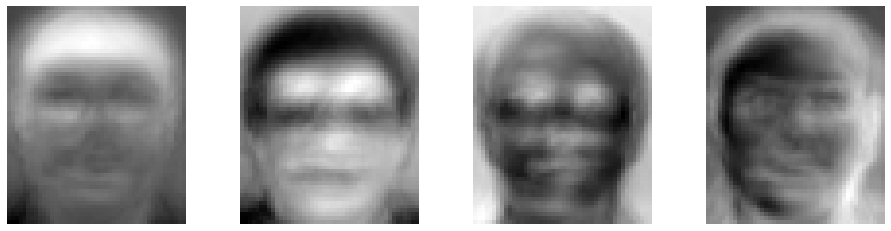

In [10]:
# Plot first four eigen faces
eigenfaces = eigenvectors[:, ::-1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for i in range(4):
    eigenface = eigenfaces[:, i].reshape((56, 46))
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_axis_off()

### Problem 2.2
(12%) Take person 2 image 1 , and project it onto the PCA eigenspace you obtained above. Recon-
struct this image using the first n = 3, 50, 170, 240, 345 eigenfaces. Plot the four reconstructed
images.

### Problem 2.3
(6%) For each of the four images you obtained in 2., compute the mean squared error (MSE) between the reconstructed image and the original image. Record the corresponding MSE values in your report.

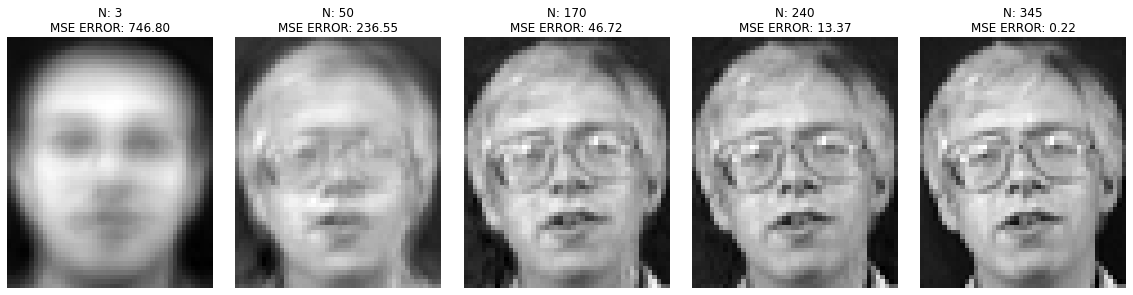

In [11]:
n_components = [3, 50, 170, 240, 345]
target_img = cv2.imread('./p2_data/2_1.png', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=1, ncols=len(n_components), figsize=(16, 4))

for i, n in enumerate(n_components):
    img = target_img.reshape(-1) - mu
    basis = eigenfaces[:, :n]
    proj_img = np.dot(img, eigenfaces)
    rec_img = (np.dot(proj_img[:n], basis.T)+mu).reshape((56, 46))
    
    mse_error = np.mean((target_img - rec_img)**2)
    axes[i].set_title("N: {}\nMSE ERROR: {:.2f}".format(n, mse_error))
    axes[i].imshow(rec_img, cmap='gray')
    axes[i].set_axis_off()
    
plt.tight_layout()

### Problem 2.4
(15%) Now, apply the k-nearest neighbors algorithm to classify the testing set images. First,
you will need to determine the best k and n values by 3-fold cross-validation. For simplicity,
the choices for such hyperparameters are k = {1, 3, 5} and n = {3, 50, 170}. Show the cross-
validation results and explain your choice for (k, n).

> The Recognition Rate is the total number of correctly identified probe images divided by the total number of probe images.

### Problem 2.5
(12%) Use your hyperparameter choice in 4. and report the recognition rate of the testing set.

In [12]:
Ks = [1, 3, 5]
Ns = [3, 50, 170]

In [13]:
results = []

for K in Ks:
    for n in Ns:
        basis = eigenfaces[:, :n]

        # Project data points to lower dimension
        train_x_proj = np.dot(train_x-mu, basis)
        test_x_proj = np.dot(test_x-mu, basis)

        # Compute pair-wise distance
        distances = pdist(train_x_proj, test_x_proj)
        indices = np.argsort(distances, axis=0)
        kindices = indices[:K]

        # Convert indices to labels
        klabels = train_y[kindices]

        # Predict the class of test image
        predicts = []
        for i in range(klabels.shape[1]):
            labels = klabels[:, i].tolist()
            predicts.append(max(labels, key=labels.count))
        predicts = np.array(predicts)

        # Recognition rate
        acc = np.sum(predicts == test_y) / len(test_y)
        
        # Append result
        results.append((K, n, acc))

In [14]:
import pandas as pd

df = pd.DataFrame(results, columns=["k", "n", "acc"])
print(df.to_string(index=False))

 k    n    acc
 1    3  0.725
 1   50  0.925
 1  170  0.950
 3    3  0.725
 3   50  0.900
 3  170  0.900
 5    3  0.600
 5   50  0.875
 5  170  0.925


## Problem 3

In [15]:
# Reference
# https://medium.com/@_init_/an-illustrated-explanation-of-performing-2d-convolutions-using-matrix-multiplications-1e8de8cd2544
import numpy as np

def conv2d(img, kernel, stride, padding):
    new_width = int((img.shape[1] - len(kernel[0]) + 2*padding)/stride + 1)
    new_height = int((img.shape[0] - len(kernel) + 2*padding)/stride + 1)
    
    # Expanded image
    old_img_width = img.shape[1]
    old_img_height = img.shape[0]
    new_img_width = img.shape[1] + padding*2
    new_img_height = img.shape[0] + padding*2
    new_img = np.zeros((new_img_height, new_img_width))
    new_img[padding*2:padding*2+old_img_height, padding*2:padding*2+old_img_width] = img
    
    # Extract image patches to column vector
    img_columns = []
    for i in range(0, len(new_img)-len(kernel)+1, stride):
        for j in range(0, len(new_img[i])-len(kernel[0])+1, stride):
            img_patch = new_img[i:i+len(kernel), j:j+len(kernel[0])]
            img_column = img_patch.reshape(-1)
            img_columns.append(img_column)
    img_columns = np.array(img_columns).T
    
    # Flattern kernel to column vector
    kernel = kernel.reshape(-1)
    
    # Transformation
    feature_map = np.dot(kernel, img_columns)
    
    feature_map = feature_map.reshape((new_height, new_width))
    
    return feature_map

### Problem 3.1

(12%) Implement a discrete 2D Gaussian filter using a 3 × 3 kernel with σ ≈ 2 ln 1 2 . Use the provided lena.png as input, and plot the output image in your report. Briefly describe the effect of the filter.

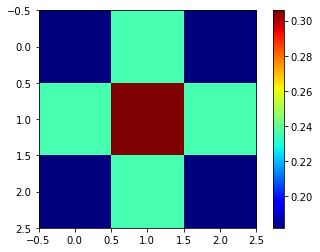

In [16]:
# 3x3 Gaussian filter
x, y = np.mgrid[-1:2, -1:2]
sigma = 1 / (2*np.log(2))
gaussian_kernel = np.exp(-(x**2+y**2)/2*(sigma**2))/(2*np.pi*(sigma**2))

plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()

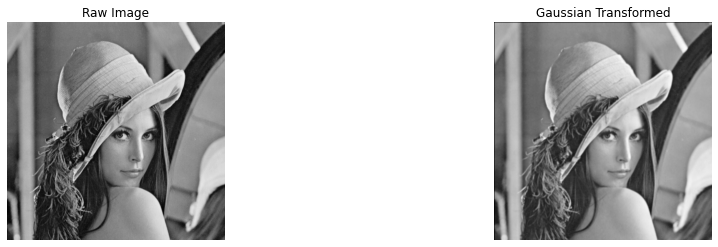

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Raw image
lena_img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
axes[0].set_title('Raw Image')
axes[0].set_axis_off()
axes[0].imshow(lena_img, cmap='gray')

# Transformed image
gaussian_img = conv2d(lena_img, gaussian_kernel, stride=1, padding=1)
axes[1].set_title('Gaussian Transformed')
axes[1].set_axis_off()
axes[1].imshow(gaussian_img, cmap='gray')

### Problem 3.2

In [18]:
h_kernel = np.array([-1, 0, 1]).reshape((1, -1))
v_kernel = np.array([-1, 0, 1]).reshape((-1, 1))

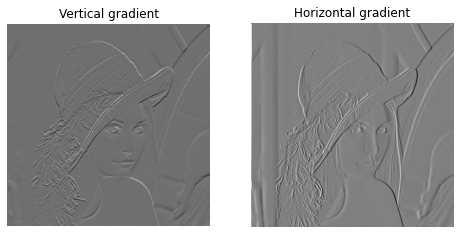

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Vertical image gradient
v_img = conv2d(lena_img, v_kernel, stride=1, padding=1)
axes[0].set_title('Vertical gradient')
axes[0].set_axis_off()
axes[0].imshow(v_img, cmap='gray')

# Horizontal image gradient
h_img = conv2d(lena_img, h_kernel, stride=1, padding=1)
axes[1].set_title('Horizontal gradient')
axes[1].set_axis_off()
axes[1].imshow(h_img, cmap='gray')

### Problem 3.3

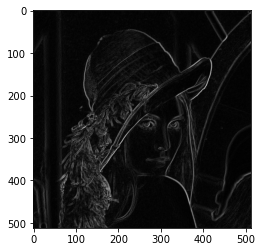

In [20]:
vg_feature = conv2d(lena_img, v_kernel, stride=1, padding=1)
hg_feature = conv2d(lena_img, h_kernel, stride=1, padding=1)

max_height = min(vg_feature.shape[0], hg_feature.shape[0])
max_width = min(vg_feature.shape[1], hg_feature.shape[1])

vg_feature = vg_feature[:max_height, :max_width]
hg_feature = hg_feature[:max_height, :max_width]

lena_gm = np.sqrt(vg_feature**2 + hg_feature**2)
plt.imshow(lena_gm, cmap='gray')

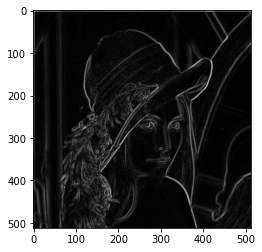

In [21]:
vg_feature = conv2d(gaussian_img, v_kernel, stride=1, padding=1)
hg_feature = conv2d(gaussian_img, h_kernel, stride=1, padding=1)

max_height = min(vg_feature.shape[0], hg_feature.shape[0])
max_width = min(vg_feature.shape[1], hg_feature.shape[1])

vg_feature = vg_feature[:max_height, :max_width]
hg_feature = hg_feature[:max_height, :max_width]

gaussian_gm = np.sqrt(vg_feature**2 + hg_feature**2)
plt.imshow(gaussian_gm, cmap='gray')